## Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import xgboost as xgb

In [2]:
from sklearn.model_selection import train_test_split

## Loading the Dataset 

In [3]:
members = pd.read_csv("members.csv")
songs = pd.read_csv("songs.csv")
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

## Data Analysis 

In [4]:
print("members",members.shape)
print("songs",songs.shape)
print("train",train.shape)
print("test",test.shape)

members (34403, 7)
songs (2296320, 7)
train (7377418, 6)
test (2556790, 6)


In [5]:
train.head()

,msno,song_id,source_system_tab,source_screen_name,source_type,target
0,FGtllVqz18RPiwJj/edr2gV78zirAiY/9SmYvia+kCg=,BBzumQNXUHKdEBOB7mAJuzok+IJA1c2Ryg/yzTF6tik=,explore,Explore,online-playlist,1
1,Xumu+NIjS6QYVxDS4/t3SawvJ7viT9hPKXmf0RtLNx8=,bhp/MpSNoqoxOIB+/l8WPqu6jldth4DIpCm3ayXnJqM=,my library,Local playlist more,local-playlist,1
2,Xumu+NIjS6QYVxDS4/t3SawvJ7viT9hPKXmf0RtLNx8=,JNWfrrC7zNN7BdMpsISKa4Mw+xVJYNnxXh3/Epw7QgY=,my library,Local playlist more,local-playlist,1
3,Xumu+NIjS6QYVxDS4/t3SawvJ7viT9hPKXmf0RtLNx8=,2A87tzfnJTSWqD7gIZHisolhe4DMdzkbd6LzO1KHjNs=,my library,Local playlist more,local-playlist,1
4,FGtllVqz18RPiwJj/edr2gV78zirAiY/9SmYvia+kCg=,3qm6XTZ6MOCU11x8FIVbAGH5l5uMkT3/ZalWG1oo2Gc=,explore,Explore,online-playlist,1


In [6]:
members.head()

,msno,city,bd,gender,registered_via,registration_init_time,expiration_date
0,XQxgAYj3klVKjR3oxPPXYYFp4soD4TuBghkhMTD4oTw=,1,0,NaN,7,20110820,20170920
1,UizsfmJb9mV54qE9hCYyU07Va97c0lCRLEQX3ae+ztM=,1,0,NaN,7,20150628,20170622
2,D8nEhsIOBSoE6VthTaqDX8U6lqjJ7dLdr72mOyLya2A=,1,0,NaN,4,20160411,20170712
3,mCuD+tZ1hERA/o5GPqk38e041J8ZsBaLcu7nGoIIvhI=,1,0,NaN,9,20150906,20150907
4,q4HRBfVSssAFS9iRfxWrohxuk9kCYMKjHOEagUMV6rQ=,1,0,NaN,4,20170126,20170613


In [7]:
songs.head()

,song_id,song_length,genre_ids,artist_name,composer,lyricist,language
0,CXoTN1eb7AI+DntdU1vbcwGRV4SCIDxZu+YD8JP8r4E=,247640,465,張信哲 (Jeff Chang),董貞,何啟弘,3.0
1,o0kFgae9QtnYgRkVPqLJwa05zIhRlUjfF7O1tDw0ZDU=,197328,444,BLACKPINK,TEDDY| FUTURE BOUNCE| Bekuh BOOM,TEDDY,31.0
2,DwVvVurfpuz+XPuFvucclVQEyPqcpUkHR0ne1RQzPs0=,231781,465,SUPER JUNIOR,NaN,NaN,31.0
3,dKMBWoZyScdxSkihKG+Vf47nc18N9q4m58+b4e7dSSE=,273554,465,S.H.E,湯小康,徐世珍,3.0
4,W3bqWd3T+VeHFzHAUfARgW9AvVRaF4N5Yzm4Mr6Eo/o=,140329,726,貴族精選,Traditional,Traditional,52.0


In [8]:
test.head()

,id,msno,song_id,source_system_tab,source_screen_name,source_type
0,0,V8ruy7SGk7tDm3zA51DPpn6qutt+vmKMBKa21dp54uM=,WmHKgKMlp1lQMecNdNvDMkvIycZYHnFwDT72I5sIssc=,my library,Local playlist more,local-library
1,1,V8ruy7SGk7tDm3zA51DPpn6qutt+vmKMBKa21dp54uM=,y/rsZ9DC7FwK5F2PK2D5mj+aOBUJAjuu3dZ14NgE0vM=,my library,Local playlist more,local-library
2,2,/uQAlrAkaczV+nWCd2sPF2ekvXPRipV7q0l+gbLuxjw=,8eZLFOdGVdXBSqoAv5nsLigeH2BvKXzTQYtUM53I0k4=,discover,NaN,song-based-playlist
3,3,1a6oo/iXKatxQx4eS9zTVD+KlSVaAFbTIqVvwLC1Y0k=,ztCf8thYsS4YN3GcIL/bvoxLm/T5mYBVKOO4C9NiVfQ=,radio,Radio,radio
4,4,1a6oo/iXKatxQx4eS9zTVD+KlSVaAFbTIqVvwLC1Y0k=,MKVMpslKcQhMaFEgcEQhEfi5+RZhMYlU3eRDpySrH8Y=,radio,Radio,radio


In [9]:
songs.describe()

,song_length,language
count,2.296320e+06,2.296319e+06
mean,2.469935e+05,3.237800e+01
std,1.609200e+05,2.433241e+01
min,1.850000e+02,-1.000000e+00
25%,1.836000e+05,-1.000000e+00
50%,2.266270e+05,5.200000e+01
75%,2.772690e+05,5.200000e+01
max,1.217385e+07,5.900000e+01


In [10]:
train.describe()

,target
count,7.377418e+06
mean,5.035171e-01
std,4.999877e-01
min,0.000000e+00
25%,0.000000e+00
50%,1.000000e+00
75%,1.000000e+00
max,1.000000e+00


In [11]:
test.describe()

,id
count,2.556790e+06
mean,1.278394e+06
std,7.380818e+05
min,0.000000e+00
25%,6.391972e+05
50%,1.278394e+06
75%,1.917592e+06
max,2.556789e+06


In [12]:
members.describe()

,city,bd,registered_via,registration_init_time,expiration_date
count,34403.000000,34403.000000,34403.000000,3.440300e+04,3.440300e+04
mean,5.371276,12.280935,5.953376,2.013994e+07,2.016901e+07
std,6.243929,18.170251,2.287534,2.954015e+04,7.320925e+03
min,1.000000,-43.000000,3.000000,2.004033e+07,1.970010e+07
25%,1.000000,0.000000,4.000000,2.012103e+07,2.017020e+07
50%,1.000000,0.000000,7.000000,2.015090e+07,2.017091e+07
75%,10.000000,25.000000,9.000000,2.016110e+07,2.017093e+07
max,22.000000,1051.000000,16.000000,2.017023e+07,2.020102e+07


In [13]:
train = train.sample(frac=0.01)
train.shape

(73774, 6)

In [14]:
train= pd.merge(train,songs,on="song_id",how="left")
train.shape

(73774, 12)

In [15]:
train.head()

,msno,song_id,source_system_tab,source_screen_name,source_type,target,song_length,genre_ids,artist_name,composer,lyricist,language
0,nUIIEsC5su/YjzyBkdtvub13rswon2m3EqJrJ934eVc=,pqcksxj9mjBUEnJOr5NqHNPRyZPj3FkuZakhGeDOtGA=,my library,Local playlist more,local-playlist,1,215574.0,1609,FAIS,Nick van de Wall,NaN,52.0
1,5LeEU4wTzlpyaKkgaxurxrM9pP3oouJ4BoxdMGjwCaI=,podlycp3c6tOEDw7q8iQBVgvFjiMpkWWXTlXljGdbTY=,discover,Discover Chart,online-playlist,0,212973.0,444,TWICE,Rado,NaN,31.0
2,hXBApkDzDy1rINogXm4UCwc6RGmx4EO1qQ16sx5yje8=,kEO5M/Xm1mtM1yFbVA5GQ4a5PmQPjuJGfEacqppDTEY=,discover,Online playlist more,online-playlist,0,262478.0,458,思衛 (Sway),思衛,葉蔓,3.0
3,U491e4BWFE+GcQDCBdgmLI7feCBzAuup9B7Q9tlq/8s=,5CXjFGh41+F2C1TqbpAvCoxLN2AhKwbhSswvmk16Vjk=,discover,Discover Feature,song-based-playlist,0,295450.0,465,4 Non Blondes,Linda Perry,NaN,52.0
4,vtBBQcqDQZuwpWrM56d0N/G10Gv6IVWR/PEE7u3gTCM=,IKMFuL0f5Y8c63Hg9BXkeNJjE0z8yf3gMt/tOxF4QNE=,my library,Local playlist more,local-library,0,244976.0,1609,The Chainsmokers,Andrew Taggart| Shaun Frank| Frederic Kennett|...,Andrew Taggart| Shaun Frank| Frederic Kennett|...,52.0


In [16]:
train = pd.merge(train,members,on="msno",how="left")
train.shape

(73774, 18)

In [17]:
train.head()

,msno,song_id,source_system_tab,source_screen_name,source_type,target,song_length,genre_ids,artist_name,composer,lyricist,language,city,bd,gender,registered_via,registration_init_time,expiration_date
0,nUIIEsC5su/YjzyBkdtvub13rswon2m3EqJrJ934eVc=,pqcksxj9mjBUEnJOr5NqHNPRyZPj3FkuZakhGeDOtGA=,my library,Local playlist more,local-playlist,1,215574.0,1609,FAIS,Nick van de Wall,NaN,52.0,1,0,NaN,7,20140225,20170920
1,5LeEU4wTzlpyaKkgaxurxrM9pP3oouJ4BoxdMGjwCaI=,podlycp3c6tOEDw7q8iQBVgvFjiMpkWWXTlXljGdbTY=,discover,Discover Chart,online-playlist,0,212973.0,444,TWICE,Rado,NaN,31.0,1,0,NaN,4,20161213,20161221
2,hXBApkDzDy1rINogXm4UCwc6RGmx4EO1qQ16sx5yje8=,kEO5M/Xm1mtM1yFbVA5GQ4a5PmQPjuJGfEacqppDTEY=,discover,Online playlist more,online-playlist,0,262478.0,458,思衛 (Sway),思衛,葉蔓,3.0,14,27,female,9,20150630,20180203
3,U491e4BWFE+GcQDCBdgmLI7feCBzAuup9B7Q9tlq/8s=,5CXjFGh41+F2C1TqbpAvCoxLN2AhKwbhSswvmk16Vjk=,discover,Discover Feature,song-based-playlist,0,295450.0,465,4 Non Blondes,Linda Perry,NaN,52.0,1,0,NaN,7,20161214,20170913
4,vtBBQcqDQZuwpWrM56d0N/G10Gv6IVWR/PEE7u3gTCM=,IKMFuL0f5Y8c63Hg9BXkeNJjE0z8yf3gMt/tOxF4QNE=,my library,Local playlist more,local-library,0,244976.0,1609,The Chainsmokers,Andrew Taggart| Shaun Frank| Frederic Kennett|...,Andrew Taggart| Shaun Frank| Frederic Kennett|...,52.0,22,20,female,9,20080626,20171014


In [18]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 73774 entries, 0 to 73773
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   msno                    73774 non-null  object 
 1   song_id                 73774 non-null  object 
 2   source_system_tab       73528 non-null  object 
 3   source_screen_name      69647 non-null  object 
 4   source_type             73562 non-null  object 
 5   target                  73774 non-null  int64  
 6   song_length             73773 non-null  float64
 7   genre_ids               72634 non-null  object 
 8   artist_name             73773 non-null  object 
 9   composer                57071 non-null  object 
 10  lyricist                42101 non-null  object 
 11  language                73770 non-null  float64
 12  city                    73774 non-null  int64  
 13  bd                      73774 non-null  int64  
 14  gender                  44094 non-null

In [19]:
train.isnull().sum()

msno                          0
song_id                       0
source_system_tab           246
source_screen_name         4127
source_type                 212
target                        0
song_length                   1
genre_ids                  1140
artist_name                   1
composer                  16703
lyricist                  31673
language                      4
city                          0
bd                            0
gender                    29680
registered_via                0
registration_init_time        0
expiration_date               0
dtype: int64

In [20]:
for x in train.select_dtypes(include=['object']).columns:
    train[x][train[x].isnull()] = 'unknown'
train = train.fillna(value=0)

<ipython-input-20-24681ba66f61>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train[x][train[x].isnull()] = 'unknown'


In [21]:
train.registration_init_time = pd.to_datetime(train.registration_init_time, format='%Y%m%d',errors='ignore')
train['registration_init_time_year'] = train['registration_init_time'].dt.year
train['registration_init_time_month'] = train['registration_init_time'].dt.month
train['registration_init_time_day'] = train['registration_init_time'].dt.day

train.expiration_date = pd.to_datetime(train.expiration_date, format='%Y%m%d',errors='ignore')
train['expiration_date_year'] = train['expiration_date'].dt.year
train['expiration_date_month'] = train['expiration_date'].dt.month
train['expiration_date_day'] = train['expiration_date'].dt.day

In [22]:
train['registration_init_time'] = train['registration_init_time'].astype('category')
train['expiration_date'] = train['expiration_date'].astype('category')

In [23]:
for i in train.select_dtypes(include=['object']).columns:
    train[i] = train[i].astype('category')

    for y in train.select_dtypes(include=['category']).columns:
        train[y] = train[y].cat.codes

In [24]:
train.head()

,msno,song_id,source_system_tab,source_screen_name,source_type,target,song_length,genre_ids,artist_name,composer,...,gender,registered_via,registration_init_time,expiration_date,registration_init_time_year,registration_init_time_month,registration_init_time_day,expiration_date_year,expiration_date_month,expiration_date_day
0,15113,23031,3,8,4,1,215574.0,52,1385,5291,...,2,7,2607,566,2014,2,25,2017,9,20
1,2115,23015,0,3,6,0,212973.0,137,4025,5748,...,2,4,3560,293,2016,12,13,2016,12,21
2,13372,20592,0,11,6,0,262478.0,147,5402,8439,...,0,9,3094,702,2015,6,30,2018,2,3
3,9336,2995,0,4,9,0,295450.0,150,63,4478,...,2,7,3561,559,2016,12,14,2017,9,13
4,17581,8524,3,8,3,0,244976.0,52,4104,412,...,0,9,910,590,2008,6,26,2017,10,14


## Data Visualization

<AxesSubplot:>

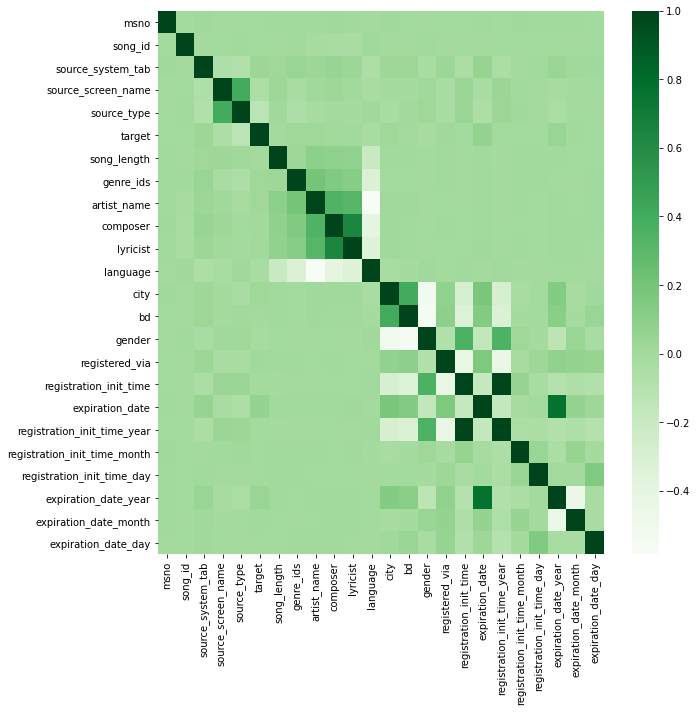

In [25]:
plt.figure(figsize=(10,10))
sns.heatmap(data=train.corr(),cmap='Greens')

In [26]:
train = train.drop(['expiration_date','lyricist'],1)
train.shape

(73774, 22)

## Feature Selection

In [27]:
train_1 = train.copy()

In [28]:
X = train_1.drop(['target'],axis=1).values
Y = train_1['target'].values

In [29]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators=250,max_depth=15,random_state=0)
classifier.fit(X,Y)

RandomForestClassifier(max_depth=15, n_estimators=250, random_state=0)

In [30]:
plot = pd.DataFrame({'features':train.columns[train.columns != 'target'],
                     'importances': classifier.feature_importances_})
plot = plot.sort_values('importances',ascending=False)

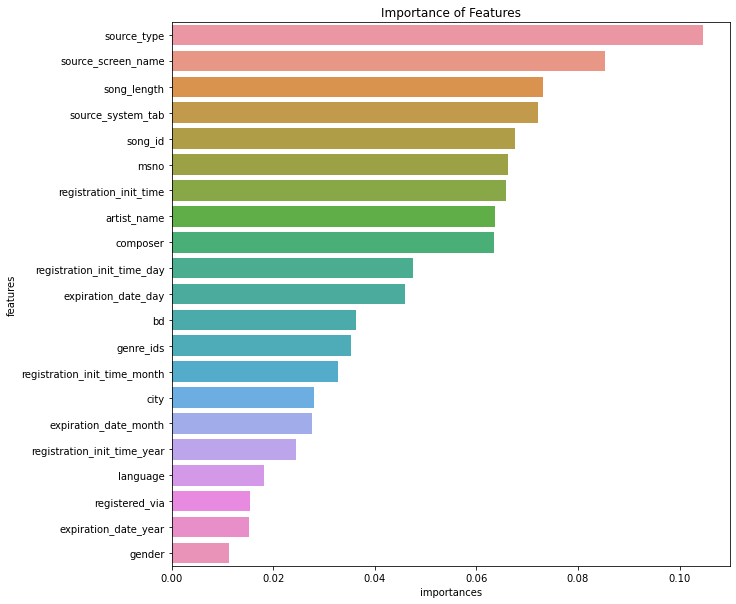

In [31]:
plt.figure(figsize=(10,10))
sns.barplot(x =plot.importances,y=plot.features)
plt.title("Importance of Features")
plt.show()

In [32]:
Z = train.copy()
Z = Z.drop(plot.features[plot.importances<0.04].tolist(),1)

In [33]:
Z.columns

Index(['msno', 'song_id', 'source_system_tab', 'source_screen_name',
       'source_type', 'target', 'song_length', 'artist_name', 'composer',
       'registration_init_time', 'registration_init_time_day',
       'expiration_date_day'],
      dtype='object')

## Splitting the data

In [42]:
Train = train.copy()

In [43]:
x = Train.drop(['target'],axis=1).values
y = Train['target'].values

In [50]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20)

In [54]:
model =xgb.XGBClassifier(learning_rate=0.1,max_depth=15,min_child_weight=5,n_estimators=250)
model.fit(x_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.1, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=15, max_leaves=0, min_child_weight=5,
              missing=nan, monotone_constraints='()', n_estimators=250,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)

## Prediction

In [55]:
prediction = model.predict(x_test)

## Model Evaluation

In [56]:
from sklearn import metrics
print(metrics.classification_report(y_test,prediction))

              precision    recall  f1-score   support

           0       0.63      0.60      0.61      7301
           1       0.63      0.66      0.64      7454

    accuracy                           0.63     14755
   macro avg       0.63      0.63      0.63     14755
weighted avg       0.63      0.63      0.63     14755

